# Imports

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Constant

In [2]:
DATASET_PATH = '/kaggle/input/zocdoc/DAC_NationalDownloadableFile.csv'

# Dictionary of doctors
dict_drs = {
    "MD": "Doctor of Medicine",
    "DO": "Doctor of Osteopathic Medicine",
    "DC": "Doctor of Chiropractic",
    "OD": "Doctor of Optometry",
    "DPM": "Doctor of Podiatric Medicine",
    "DDS": "Doctor of Dental Surgery",
    "DDM": "Doctor of Dental Medicine",
    "PSY": "Psychologist"
}

# Dictionary of nurses
dict_nurse = {
    "NP": "Nurse Practitioner",
    "CNA": "Certified Nursing Assistant",
    "CNS": "Clinical Nurse Specialist",
    "CNM": "Certified Nurse Midwife"
}

# Dictionary of assistants
dict_assistant = {
    "PA": "Physician Assistant",
    "AA": "Anesthesiologist Assistant"
}

# Dictionary of specialities
dr_specialities = {
    'cardiologist': 'cardio',
    'chiropractor': 'chiro',
    'dentist': 'dent',
    'dermatologist': 'derma',
    'dietitian': 'diet',
    'ent': 'ear',
    'gastroenterologist': 'gas',
    'neurosurgeon': 'neur',
    'obgyn': 'ob|gyn',
    'oncologist': 'onco',
    'optometrist': 'opto',
    'orthopedic': 'ortho',
    'pain_management': 'pain',
    'phy_therapist': 'phy',
    'podiatrist': 'podia',
    'pcd': 'primary care|pcd',
    'psychiatrist': 'psy',
    'rheumatologist': 'rhe',
    'sports_medicine': 'sport',
    'surgeon': 'surg',
#     'orthopedic_surgeon': '',
}

speciality_name = []
for (key,value) in dr_specialities.items():
    speciality_name.append(key)

# Code

### Step1: Load original national dataset

In [3]:
%%time
df = pd.read_csv(DATASET_PATH, low_memory=False)

CPU times: user 22.7 s, sys: 4.22 s, total: 26.9 s
Wall time: 31.9 s


In [4]:
df.head(4)

,NPI,Ind_PAC_ID,Ind_enrl_ID,Provider Last Name,Provider First Name,Provider Middle Name,suff,gndr,Cred,Med_sch,...,adr_ln_1,adr_ln_2,ln_2_sprs,City/Town,State,ZIP Code,Telephone Number,ind_assgn,grp_assgn,adrs_id
0,1790868909,42100042,I20100809000798,HAGHIGHI,BIJAN,NaN,NaN,M,NaN,UNIVERSITY OF SOUTHERN CALIFORNIA KECK SCHOOL ...,...,1 HOAG DR,NaN,NaN,NEWPORT BEACH,CA,926634162,9.498911e+09,Y,Y,CA926634162NE1XXXXDRXX300
1,1114033073,42100109,I20040319001256,JONES,TAMMY,JO,NaN,F,CNA,OTHER,...,327 MEDICAL PARK DR,NaN,NaN,BRIDGEPORT,WV,263309006,6.813423e+09,Y,Y,WV263309006BR327XXDRXX400
2,1508823618,42100117,I20050426000780,GRIFFIN,DAVID,NaN,NaN,M,MD,VANDERBILT UNIVERSITY SCHOOL OF MEDICINE,...,1 SAINT FRANCIS DR,NaN,NaN,GREENVILLE,SC,296013955,5.138539e+09,Y,Y,SC296013955GR1XXXXDRXX400
3,1508823618,42100117,I20050426000780,GRIFFIN,DAVID,NaN,NaN,M,MD,VANDERBILT UNIVERSITY SCHOOL OF MEDICINE,...,317 SAINT FRANCIS DR,SUITE 220,NaN,GREENVILLE,SC,296013976,8.642552e+09,Y,Y,SC296013976GR317XXDRXX402


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572154 entries, 0 to 2572153
Data columns (total 31 columns):
 #   Column                Dtype  
---  ------                -----  
 0   NPI                   int64  
 1   Ind_PAC_ID            int64  
 2   Ind_enrl_ID           object 
 3   Provider Last Name    object 
 4   Provider First Name   object 
 5   Provider Middle Name  object 
 6   suff                  object 
 7   gndr                  object 
 8   Cred                  object 
 9   Med_sch               object 
 10  Grd_yr                float64
 11  pri_spec              object 
 12  sec_spec_1            object 
 13  sec_spec_2            object 
 14  sec_spec_3            object 
 15  sec_spec_4            object 
 16  sec_spec_all          object 
 17  Telehlth              object 
 18  Facility Name         object 
 19  org_pac_id            float64
 20  num_org_mem           float64
 21  adr_ln_1              object 
 22  adr_ln_2              object 
 23  ln_2_sp

In [6]:
df['Cred'].value_counts()

Cred
MD     401558
PA      38702
DO      24746
NP      24595
CNA     17890
DC      12660
OD      11942
PT      11915
DPM      8175
CSW      7153
CP       5816
OT       1284
AU       1123
CNS       883
MNT       778
CNM       774
AA        435
DDS       363
DDM       178
PSY       112
SCW         2
Name: count, dtype: int64

### Step2: Make new dataset using the national dataset attributes

In [7]:
%%time
new_df = pd.DataFrame({
    'enrl_id': df['Ind_enrl_ID'], # Extra
    'name': df['Provider First Name'] + ' ' + df['Provider Middle Name'].fillna('') + ' ' + df['Provider Last Name'],
    'job_title': df['pri_spec'],
    'rating': np.nan,
    'facility_name': df['Facility Name'],
    'street_address': df['adr_ln_1'].fillna('') + ' ' + df['adr_ln_2'].fillna(''),
    'address_locality': df['City/Town'],
    'region': df['State'],
    'postal_code': df['ZIP Code'],
    'is_dr': 0,
    'is_nurse': 0,
    'is_assistant': 0,
    'credential': df['Cred'],
})

CPU times: user 6.07 s, sys: 1.29 s, total: 7.36 s
Wall time: 7.35 s


In [8]:
new_df.head(3)

,enrl_id,name,job_title,rating,facility_name,street_address,address_locality,region,postal_code,is_dr,is_nurse,is_assistant,credential
0,I20100809000798,BIJAN HAGHIGHI,PATHOLOGY,NaN,NEWPORT HARBOR PATHOLOGY MEDICAL GROUP INC,1 HOAG DR,NEWPORT BEACH,CA,926634162,0,0,0,NaN
1,I20040319001256,TAMMY JO JONES,CERTIFIED REGISTERED NURSE ANESTHETIST (CRNA),NaN,UNITED HOSPITAL CENTER INC,327 MEDICAL PARK DR,BRIDGEPORT,WV,263309006,0,0,0,CNA
2,I20050426000780,DAVID GRIFFIN,GYNECOLOGICAL ONCOLOGY,NaN,BON SECOURS MEDICAL GROUP GREENVILLE SPECIALTY...,1 SAINT FRANCIS DR,GREENVILLE,SC,296013955,0,0,0,MD


### Step3: Impute values of 'is_dr', 'is_nurse', 'is_assistant'

In [9]:
%%time
for index, row in new_df.iterrows():
    credential = row['credential']

    if credential in dict_drs:
        new_df.at[index, 'is_dr'] = 1
    if credential in dict_nurse:
        new_df.at[index, 'is_nurse'] = 1
    if credential in dict_assistant:
        new_df.at[index, 'is_assistant'] = 1

CPU times: user 3min 2s, sys: 272 ms, total: 3min 2s
Wall time: 3min 2s


In [10]:
new_df.head(3)

,enrl_id,name,job_title,rating,facility_name,street_address,address_locality,region,postal_code,is_dr,is_nurse,is_assistant,credential
0,I20100809000798,BIJAN HAGHIGHI,PATHOLOGY,NaN,NEWPORT HARBOR PATHOLOGY MEDICAL GROUP INC,1 HOAG DR,NEWPORT BEACH,CA,926634162,0,0,0,NaN
1,I20040319001256,TAMMY JO JONES,CERTIFIED REGISTERED NURSE ANESTHETIST (CRNA),NaN,UNITED HOSPITAL CENTER INC,327 MEDICAL PARK DR,BRIDGEPORT,WV,263309006,0,1,0,CNA
2,I20050426000780,DAVID GRIFFIN,GYNECOLOGICAL ONCOLOGY,NaN,BON SECOURS MEDICAL GROUP GREENVILLE SPECIALTY...,1 SAINT FRANCIS DR,GREENVILLE,SC,296013955,1,0,0,MD


In [11]:
# Drop 'credential' column
new_df = new_df.drop(columns=['credential'])

# Filter regions
new_df = new_df[new_df['region'].isin(['NY', 'NJ', 'PA', 'DE'])]

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379976 entries, 36 to 2572134
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   enrl_id           379976 non-null  object 
 1   name              379951 non-null  object 
 2   job_title         379976 non-null  object 
 3   rating            0 non-null       float64
 4   facility_name     350946 non-null  object 
 5   street_address    379976 non-null  object 
 6   address_locality  379976 non-null  object 
 7   region            379976 non-null  object 
 8   postal_code       379976 non-null  object 
 9   is_dr             379976 non-null  int64  
 10  is_nurse          379976 non-null  int64  
 11  is_assistant      379976 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 37.7+ MB


In [13]:
for index, row in new_df.iterrows():
    job_title = row['job_title'].lower()  # Convert to lowercase to handle case insensitivity
    
    for speciality, keywords in dr_specialities.items():
        if any(keyword in job_title for keyword in keywords.split('|')):
            new_df.at[index, 'job_title'] = speciality
            break

In [14]:
new_df['job_title'].value_counts()

job_title
phy_therapist                       74668
NURSE PRACTITIONER                  40666
INTERNAL MEDICINE                   26814
DIAGNOSTIC RADIOLOGY                24681
FAMILY PRACTICE                     17594
                                    ...  
MEDICAL GENETICS AND GENOMICS          28
MEDICAL TOXICOLOGY                     12
PERIPHERAL VASCULAR DISEASE             3
ORAL MEDICINE                           1
ORAL AND MAXILLOFACIAL PATHOLOGY        1
Name: count, Length: 62, dtype: int64

In [15]:
(new_df['job_title'] == 'surgeon').sum()

12519

In [16]:
filtered_df = new_df[new_df['job_title'].isin(speciality_name)]

In [17]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175854 entries, 90 to 2572134
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   enrl_id           175854 non-null  object 
 1   name              175850 non-null  object 
 2   job_title         175854 non-null  object 
 3   rating            0 non-null       float64
 4   facility_name     159344 non-null  object 
 5   street_address    175854 non-null  object 
 6   address_locality  175854 non-null  object 
 7   region            175854 non-null  object 
 8   postal_code       175854 non-null  object 
 9   is_dr             175854 non-null  int64  
 10  is_nurse          175854 non-null  int64  
 11  is_assistant      175854 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 17.4+ MB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

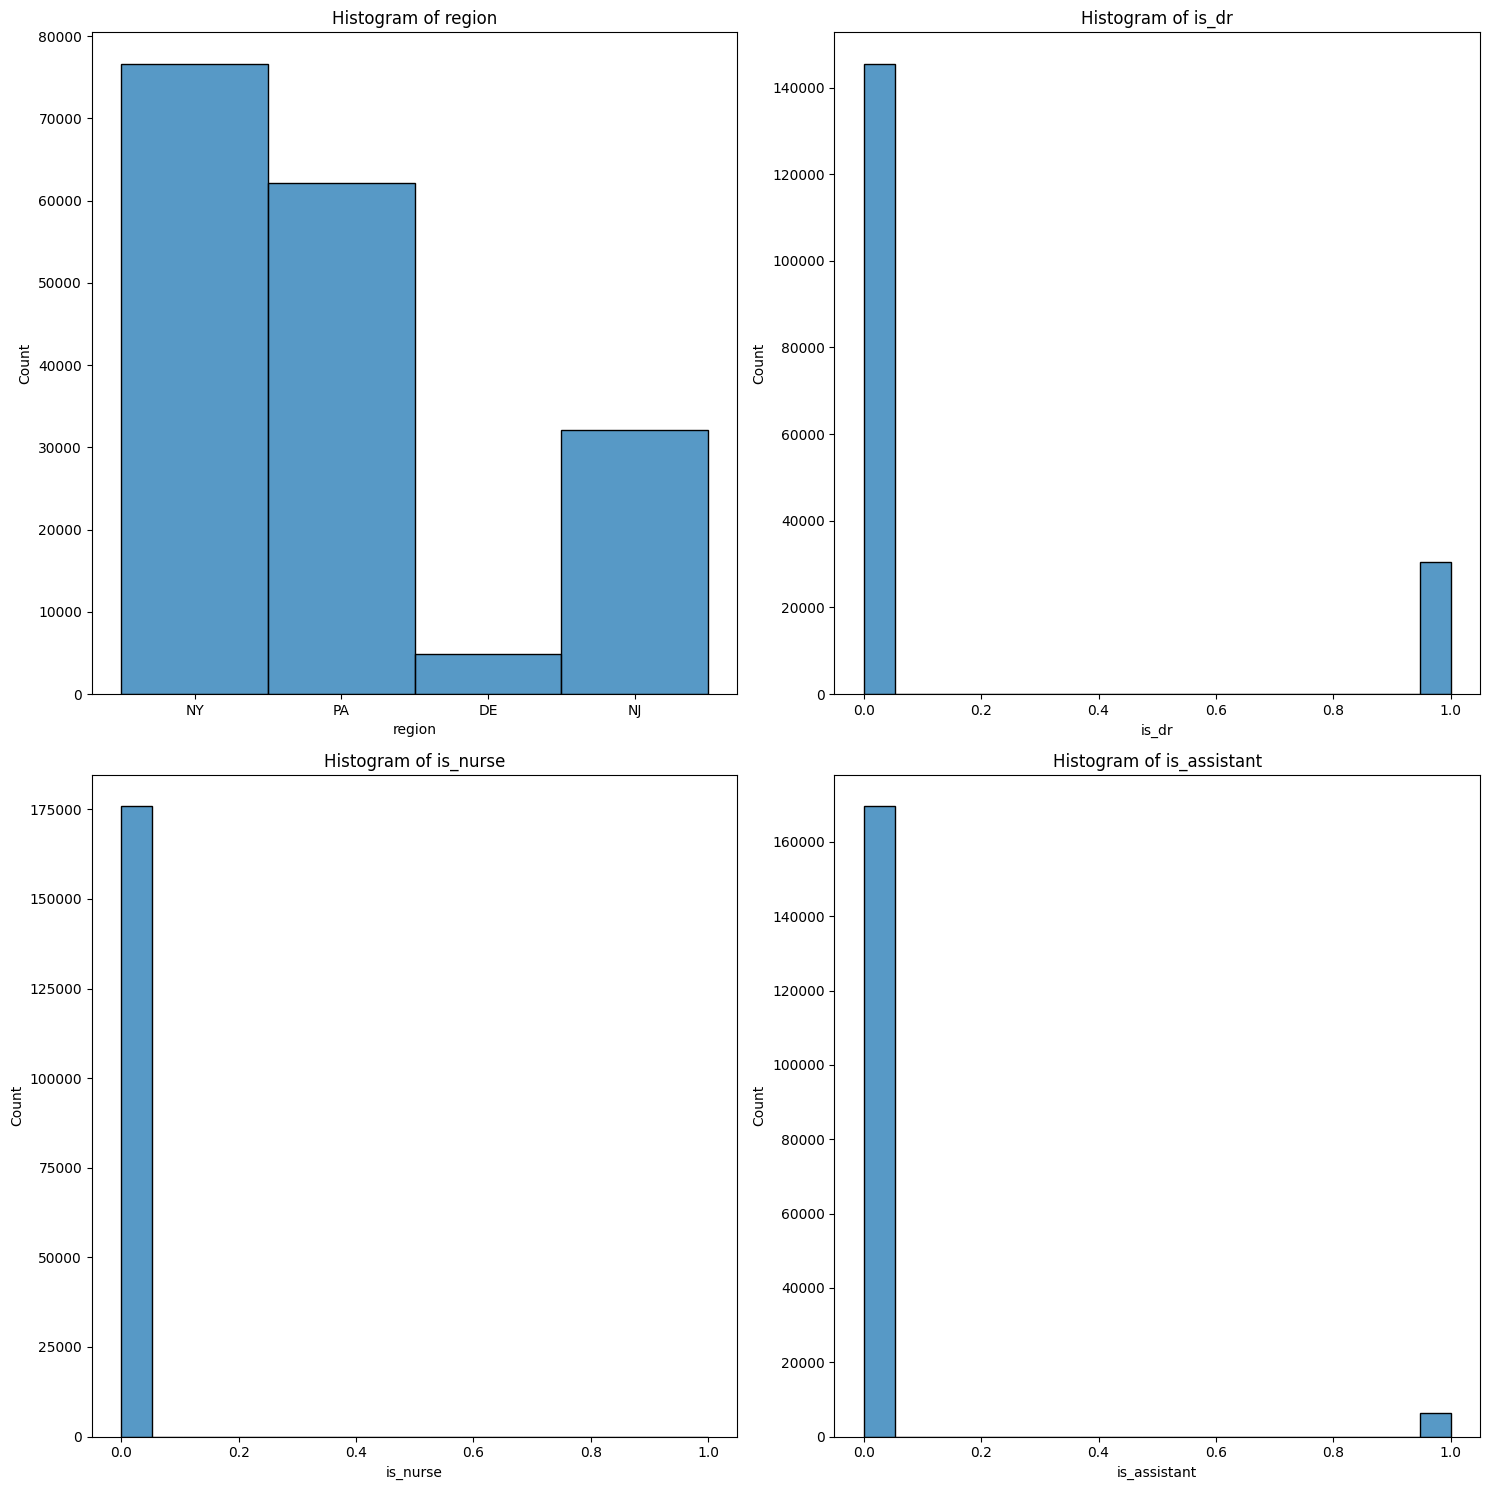

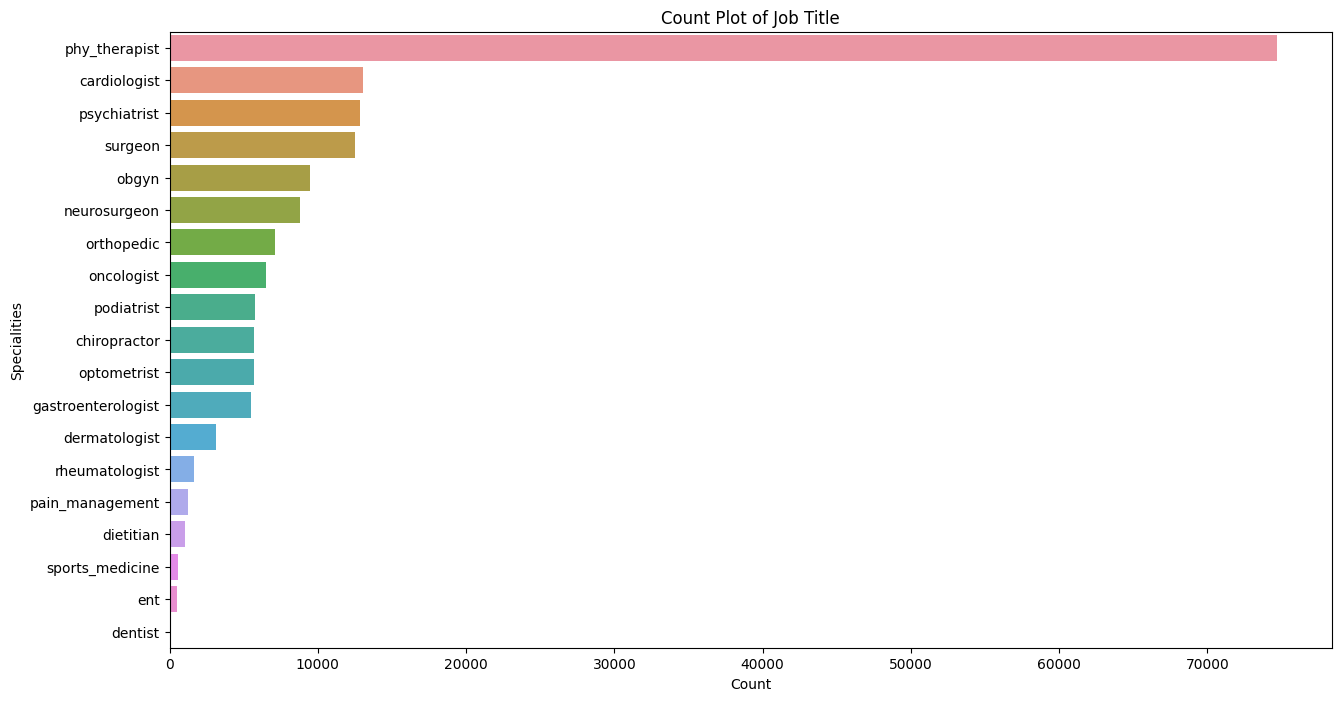

In [18]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # 2 rows, 2 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of columns to plot
columns = ['region', 'is_dr', 'is_nurse', 'is_assistant']

# Plot histograms
for i, column in enumerate(columns):
    sns.histplot(filtered_df[column], ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Separate plot for 'job_title'
plt.figure(figsize=(15, 8))
sns.countplot(y=filtered_df['job_title'], order=filtered_df['job_title'].value_counts().index)
plt.title('Count Plot of Job Title')
plt.xlabel('Count')
plt.ylabel('Specialities')
plt.show()

### Step4: Save finalised dataframe

In [19]:
new_df.to_csv('df_dac_finalised.csv', index=False)